# Interleaved Randomized Benchmarking (IRB)

The interleaved randomized benchmarking routine allows us to estimate the gate fidelity of single
qubit Clifford gates. To demonstrate this routine, consider device noise modelled by an amplitude 
damping channel with decay probability $\gamma=0.01$

In [1]:
import cirq
import numpy as np

decay_prob = 0.05
noise = cirq.AmplitudeDampingChannel(gamma=decay_prob)
simulator = cirq.DensityMatrixSimulator(noise=noise)

It is known that an amplitude damping channel with decay probability $\gamma$ leads to a gate error
$$\frac13 + \frac{\gamma}{6} - \frac{\sqrt{1-\gamma}}{3}$$

In [2]:
expected_gate_error = 1 / 3 + decay_prob / 6 - np.sqrt(1 - decay_prob) / 3

In [3]:
from supermarq.qcvv import IRB

experiment = IRB()
experiment.prepare_experiment(100, [1, 5, 10, 15])
experiment.run_with_simulator(simulator=simulator)

Building circuits:   0%|          | 0/400 [00:00<?, ?it/s]

Simulating circuits:   0%|          | 0/800 [00:00<?, ?it/s]

IRBResults(target='Local simulator', total_circuits=800, experiment_name='IRB', rb_layer_fidelity=0.9671846265179108, rb_layer_fidelity_std=0.000987097677514484, irb_layer_fidelity=0.937823622414394, irb_layer_fidelity_std=0.0023115403435816856, average_interleaved_gate_error=0.015178593258467765, average_interleaved_gate_error_std=0.001293374288000066)


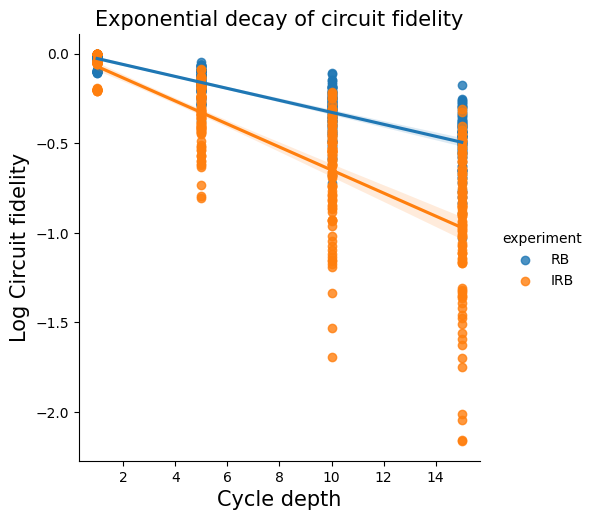

In [4]:
if experiment.collect_data():
    results = experiment.analyze_results(plot_results=True)
    print(results)

In [5]:
print(f"Expected gate error: {expected_gate_error:.6f}")
print(
    f"Measured gate error: {results.average_interleaved_gate_error:.6f} +/- {results.average_interleaved_gate_error_std:.6f}"
)

Expected gate error: 0.016774
Measured gate error: 0.015179 +/- 0.001293
